# Sir Lewis Hamilton

In [76]:
import pandas as pd
import sqlite3

con = sqlite3.connect("../data/f1data.sqlite")

In [77]:
query = """
SELECT
  r.date,
  r.round,
  r.year,
  re.position,
  re.points
FROM results AS re
JOIN races AS r ON re.raceId = r.raceId
JOIN drivers AS d ON re.driverId = d.driverId
WHERE
  d.code = 'HAM'
  AND r.year >= 2010
"""

df = pd.read_sql(
  query,
  con,
  index_col="date",
  parse_dates="date"
)

colors = [
  "#999999",  # McLaren
  "#999999",
  "#999999",
  "#00A19C",  # Mercedes
  "#00A19C",
  "#00A19C",
  "#00A19C",
  "#00A19C",
  "#00A19C",
  "#00A19C",
  "#00A19C",
  "#00A19C",
  "#00A19C",
]

## Average Points per Race

* Not Including Sprint Race points;
* Starting from 2010, due to point system change;

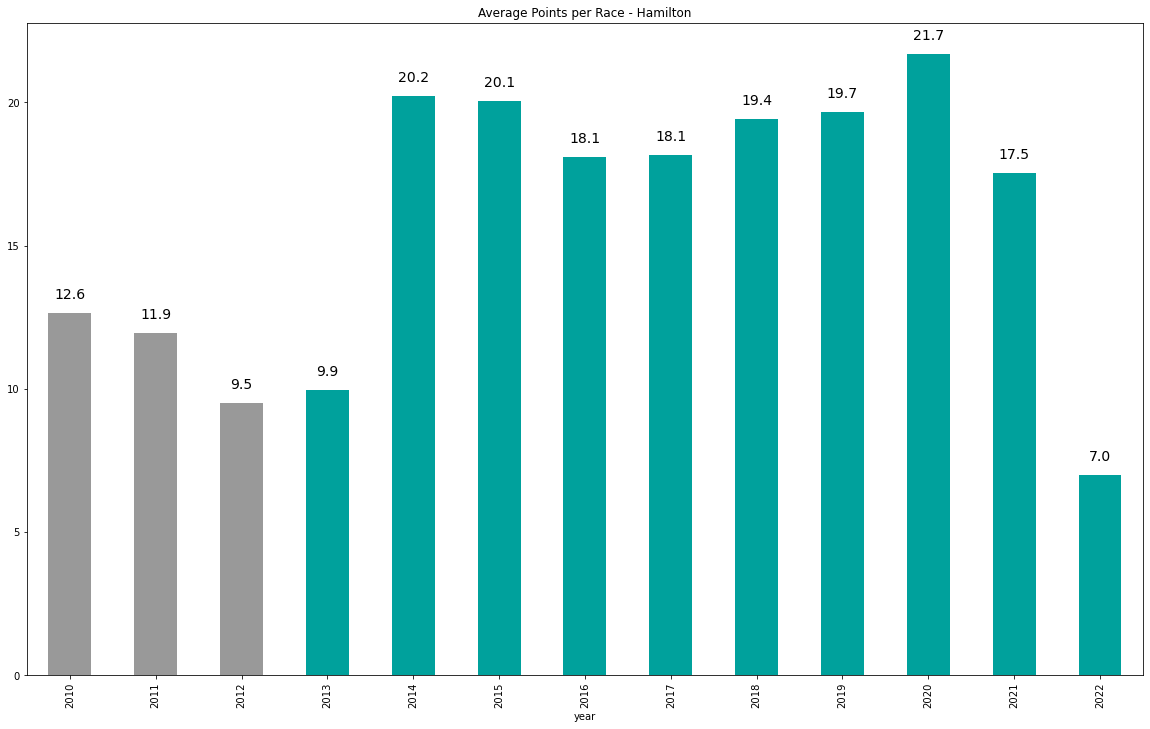

In [78]:
avg_pts_by_year = df.groupby("year").mean()["points"]
ax = avg_pts_by_year.plot(
  kind="bar",
  title="Average Points per Race - Hamilton",
  color=colors,
  figsize=(20, 12),
)

for idx, p in enumerate(avg_pts_by_year):
  ax.text(idx, p + 0.5, f"{p:0.1f}", ha="center", fontsize=14)